1. RDB 에서 파생된 테이블 같은대 어떤 관계를 가지고있는지 궁금해

In [2]:
import pandas as pd
import numpy as np

In [3]:
gender_age = pd.read_csv("./data/gender_age_train.csv", dtype={'device_id': np.str})

In [4]:
print gender_age.head()

              device_id gender  age   group
0  -8076087639492063270      M   35  M32-38
1  -2897161552818060146      M   35  M32-38
2  -8260683887967679142      M   35  M32-38
3  -4938849341048082022      M   30  M29-31
4    245133531816851882      M   30  M29-31


In [5]:
np.unique(gender_age.groupby(['device_id'])['device_id'].agg('count').values)

array([1])

이벤트 조사해보자
device_id  가 가장 많은 애는 몇개일까?

In [6]:
events = pd.read_csv("./data/events.csv", dtype={'device_id': np.str})

In [7]:
print events.head()
print events.shape


   event_id             device_id            timestamp  longitude  latitude
0         1     29182687948017175  2016-05-01 00:55:25     121.38     31.24
1         2  -6401643145415154744  2016-05-01 00:54:12     103.65     30.97
2         3  -4833982096941402721  2016-05-01 00:08:05     106.60     29.70
3         4  -6815121365017318426  2016-05-01 00:06:40     104.27     23.28
4         5  -5373797595892518570  2016-05-01 00:07:18     115.88     28.66
(3252950, 5)


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
device_counts = events.groupby('device_id')['event_id'].count()

In [10]:
filtered_device_counts = device_counts[device_counts < 50]

In [11]:
counts, bins = np.histogram(filtered_device_counts.values, bins=100, range=(0, 1000))

(array([ 95.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.]),
 array([    0.,    10.,    20.,    30.,    40.,    50.,    60.,    70.,
           80.,    90.,   100.,   110.,   120.,   130.,   140.,   150.,
          160.,   170.,   180.,   190.,   200.,   210.,   220.,   230.,
          240.,   250.,   260.,   270.,   280.,   290.,   300.,   310.,
          320.,   330.,   340.

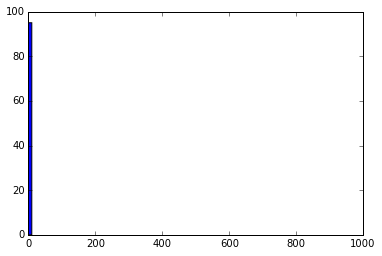

In [12]:
plt.hist(counts, bins)

{'boxes': [<matplotlib.lines.Line2D at 0x10f83ed10>],
 'caps': [<matplotlib.lines.Line2D at 0x10f84bd10>,
 'fliers': [<matplotlib.lines.Line2D at 0x10f862050>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x10f8579d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x10f83efd0>,
  <matplotlib.lines.Line2D at 0x10f84b6d0>]}

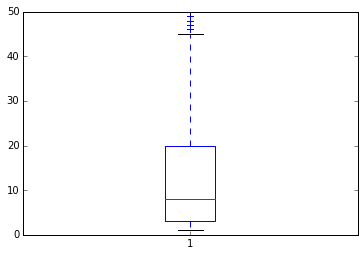

In [13]:
plt.boxplot(filtered_device_counts.values)

In [14]:
import seaborn as sns
sns.set(color_codes=True)

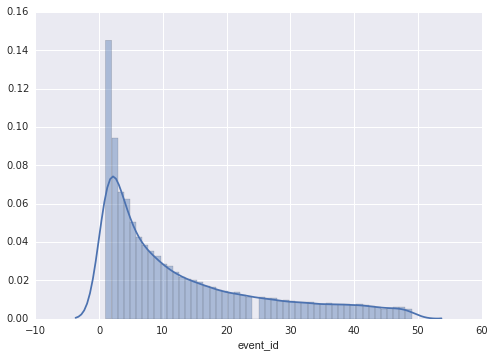

In [15]:
sns.distplot(filtered_device_counts)

phone brand 를 봐볼까

In [16]:
pbd = pd.read_csv('./data/phone_brand_device_model.csv', dtype={'device_id': np.str})

In [17]:
print pbd.head()
print pbd.describe()

              device_id phone_brand   device_model
0  -8890648629457979026          小米             红米
1   1277779817574759137          小米           MI 2
2   5137427614288105724          三星      Galaxy S4
3   3669464369358936369       SUGAR           时尚手机
4  -5019277647504317457          三星  Galaxy Note 2
                  device_id phone_brand device_model
count                187245      187245       187245
unique               186716         131         1599
top     3025995277115604469          小米       红米note
freq                      2       43210         7358


In [18]:
len(pbd.groupby('device_id').count()[pbd.groupby('device_id')['device_id'].count().values > 1])

529

In [19]:
print pbd.groupby('device_id').count()[pbd.groupby('device_id')['device_id'].count().values > 1].head()
print pbd[pbd['device_id'] == '-1054056445342375195']
          

                      phone_brand  device_model
device_id                                      
-1054056445342375195            2             2
-1058976689976607809            2             2
-1060418556246365354            2             2
-1076064832252218291            2             2
-1087216240998270009            2             2
                  device_id phone_brand device_model
69332  -1054056445342375195          华为          畅享5
82347  -1054056445342375195          华为          畅享5


In [20]:
gender_pbd = pd.merge(gender_age, pbd, how='left', on='device_id')

In [21]:
print gender_pbd.head()

              device_id gender  age   group phone_brand device_model
0  -8076087639492063270      M   35  M32-38          小米         MI 2
1  -2897161552818060146      M   35  M32-38          小米         MI 2
2  -8260683887967679142      M   35  M32-38          小米         MI 2
3  -4938849341048082022      M   30  M29-31          小米       红米note
4    245133531816851882      M   30  M29-31          小米         MI 3


In [28]:
gender_pbd.groupby(['phone_brand']).count()

,device_id,gender,age,group,device_model
phone_brand,,,,,
E派,10,10,10,10,10
HTC,1015,1015,1015,1015,1015
LG,333,333,333,333,333
LOGO,19,19,19,19,19
Lovme,15,15,15,15,15
MIL,1,1,1,1,1
OPPO,5802,5802,5802,5802,5802
PPTV,3,3,3,3,3
SUGAR,6,6,6,6,6


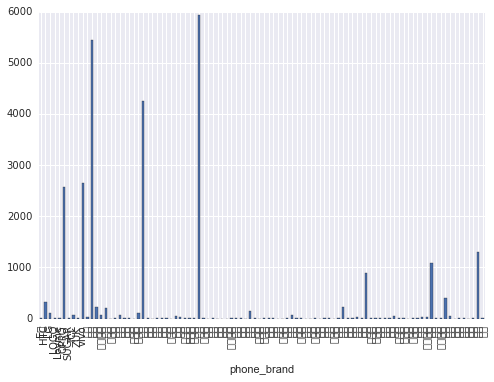

In [23]:
gender_pbd[gender_pbd['gender'] == 'F'].groupby(['phone_brand'])['device_id'].count().plot(kind='bar')

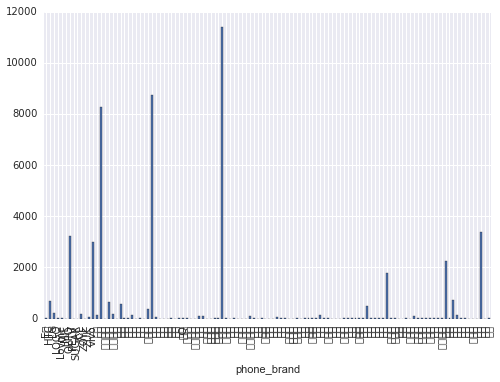

In [24]:
gender_pbd[gender_pbd['gender'] == 'M'].groupby(['phone_brand'])['device_id'].count().plot(kind='bar')

In [25]:
gender_count = gender_pbd.groupby(['gender', 'phone_brand'])['device_id'].count()